<a href="https://colab.research.google.com/github/martinkim1/2024-1-my-BDA/blob/main/%EA%B3%BC%EC%A0%9C/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
import site
import numpy as np
import pandas as pd
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 34.3 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [4]:
df = pd.read_excel('고용률.xlsx')
print(df.head())

   year  15~19  20~29  30~39  40~49  50~59   60~
0  2014    7.7   57.4   74.1   79.1   74.2  39.0
1  2015    7.8   57.9   74.4   79.1   74.4  39.0
2  2016    8.0   58.2   74.7   79.3   74.3  39.5
3  2017    8.4   57.6   75.3   79.4   75.3  39.9
4  2018    7.4   57.9   75.7   79.0   75.2  40.1


In [5]:
df['청년층'] = df[['15~19', '20~29']].mean(axis=1)
df['중년층'] = df[['30~39', '40~49']].mean(axis=1)
df['장년층'] = df[['50~59', '60~']].mean(axis=1)

print(df[['year', '청년층', '중년층', '장년층']])

   year    청년층    중년층    장년층
0  2014  32.55  76.60  56.60
1  2015  32.85  76.75  56.70
2  2016  33.10  77.00  56.90
3  2017  33.00  77.35  57.60
4  2018  32.65  77.35  57.65
5  2019  32.90  77.20  58.45
6  2020  31.15  76.20  58.35
7  2021  32.40  76.30  59.00
8  2022  34.20  77.70  60.80
9  2023  34.05  78.75  61.60


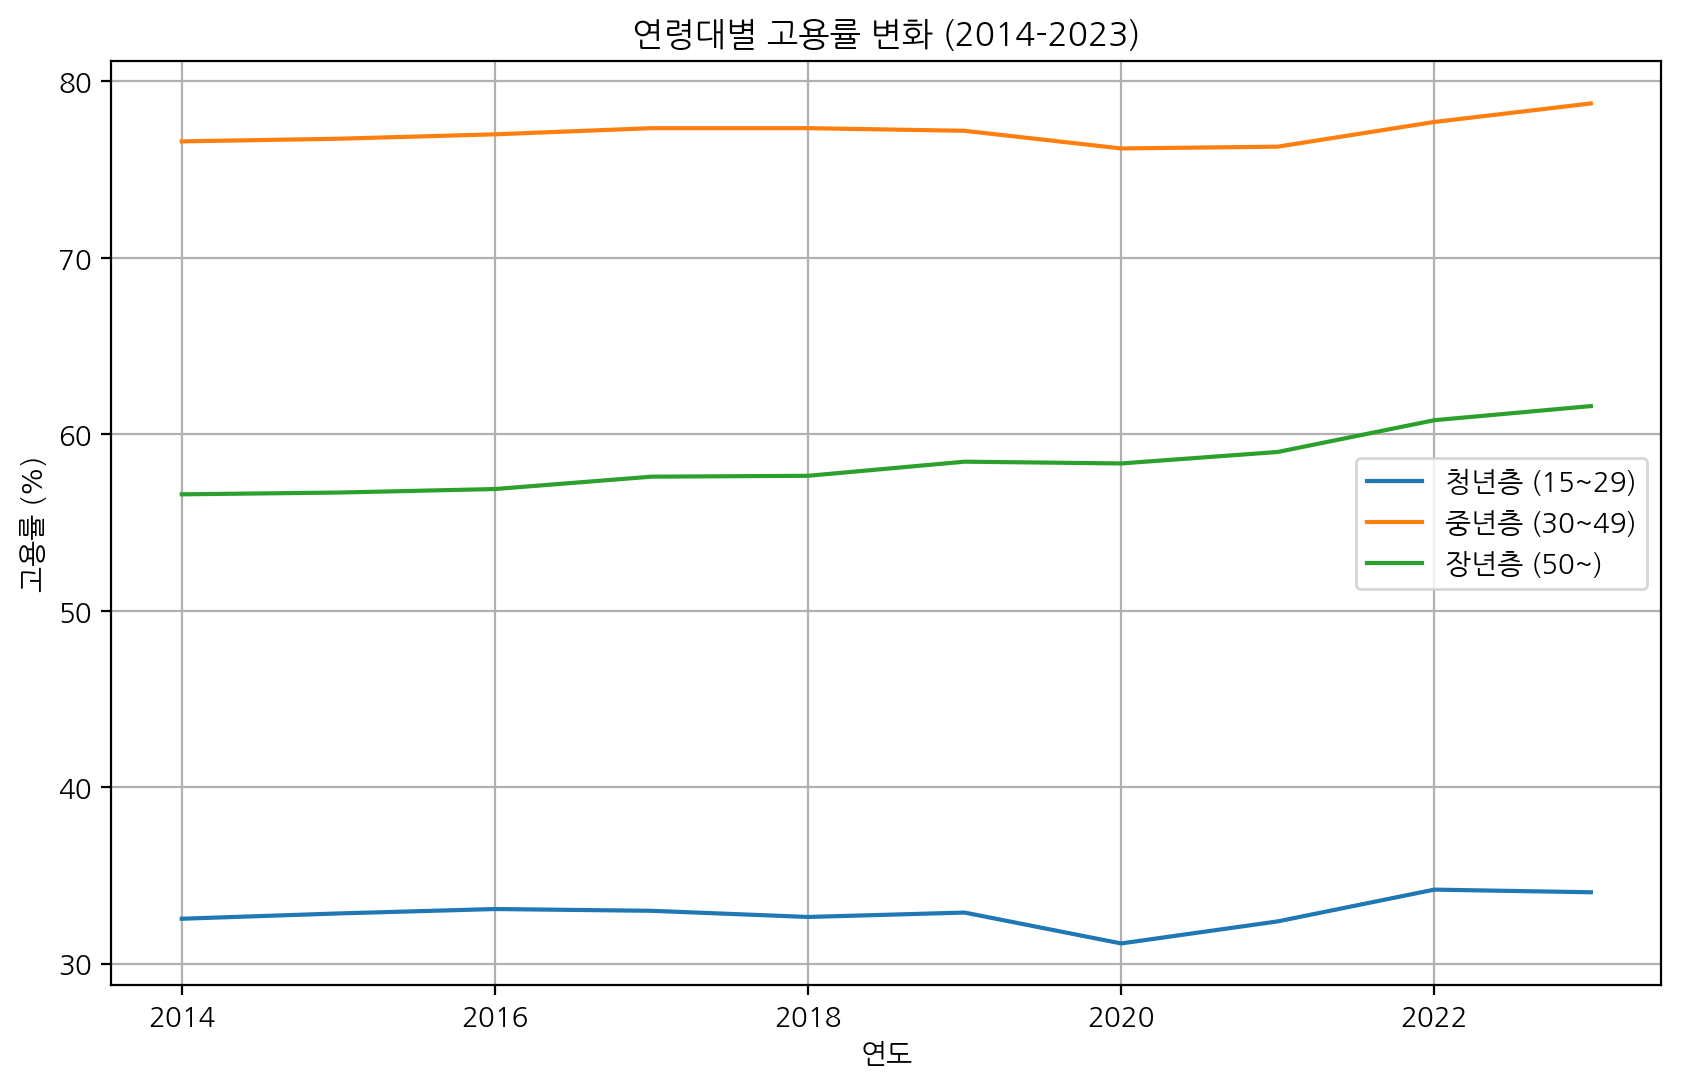

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['청년층'], label='청년층 (15~29)')
plt.plot(df['year'], df['중년층'], label='중년층 (30~49)')
plt.plot(df['year'], df['장년층'], label='장년층 (50~)')

plt.xlabel('연도')
plt.ylabel('고용률 (%)')
plt.title('연령대별 고용률 변화 (2014-2023)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
df = pd.read_excel('청년_고용동향.xlsx')
print(df.head())

   year  생산가능인구  경제활동인구   취업자  실업자  실업률   고용률  경제활동참가율
0  2014    9395    4179  3802  378  9.0  40.5     44.5
1  2015    9380    4253  3864  389  9.1  41.2     45.3
2  2016    9363    4334  3908  426  9.8  41.7     46.3
3  2017    9282    4333  3907  426  9.8  42.1     46.7
4  2018    9149    4312   304  408  9.5  42.7     47.1


In [8]:
df = pd.read_excel('고령자_고용동향.xlsx')
print(df.head())

   year  경제활동참가율   고용률  실업률
0  2019     68.9  66.9  3.0
1  2020     68.8  66.6  3.3
2  2021     68.6  66.3  3.3
3  2022     70.3  68.8  2.2
4  2023     71.4  69.9  2.1


In [9]:
df_youth = pd.read_excel('청년_고용동향.xlsx')
df_elderly = pd.read_excel('고령자_고용동향.xlsx')

# 필요한 데이터 필터링
df_youth_filtered = df_youth[df_youth['year'].between(2019, 2023)]
df_elderly_filtered = df_elderly[df_elderly['year'].between(2019, 2023)]

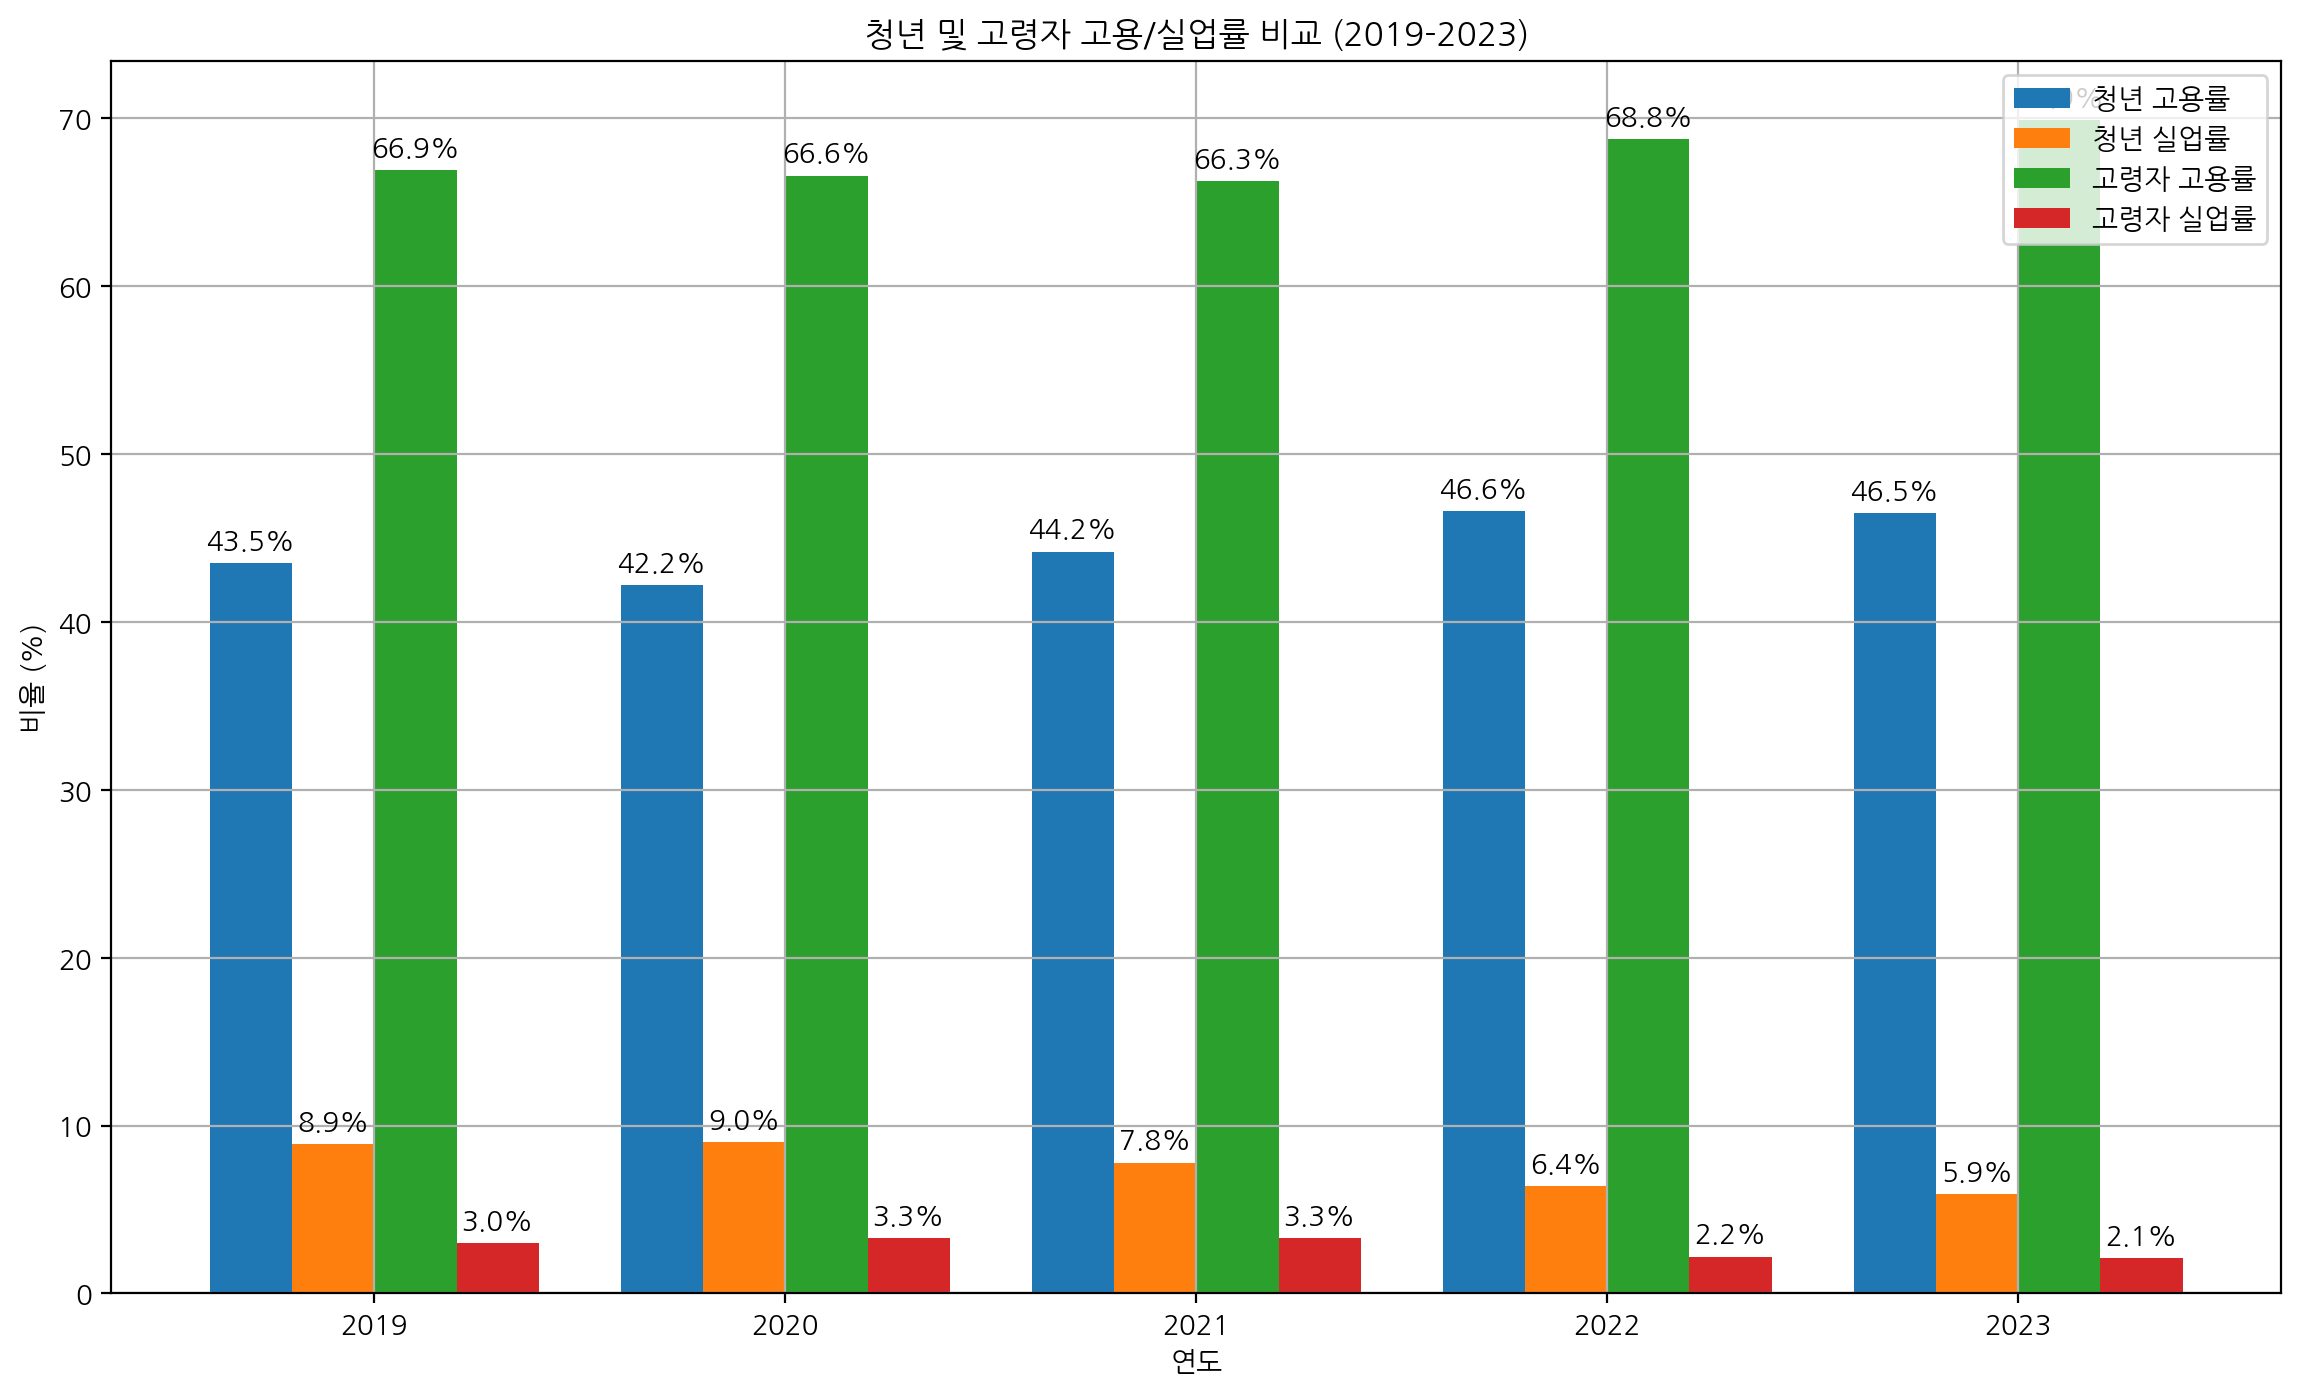

In [13]:
years = df_youth_filtered['year'].values
bar_width = 0.2  # 막대 너비

fig, ax = plt.subplots(figsize=(14, 8))

# 청년 고용률과 실업률
index = np.arange(len(years))
bar1 = ax.bar(index - 1.5 * bar_width, df_youth_filtered['고용률'], bar_width, label='청년 고용률')
bar2 = ax.bar(index - 0.5 * bar_width, df_youth_filtered['실업률'], bar_width, label='청년 실업률')

# 고령자 고용률과 실업률
bar3 = ax.bar(index + 0.5 * bar_width, df_elderly_filtered['고용률'], bar_width, label='고령자 고용률')
bar4 = ax.bar(index + 1.5 * bar_width, df_elderly_filtered['실업률'], bar_width, label='고령자 실업률')

ax.set_xlabel('연도')
ax.set_ylabel('비율 (%)')
ax.set_title('청년 및 고령자 고용/실업률 비교 (2019-2023)')
ax.set_xticks(index)
ax.set_xticklabels(years)
ax.legend()

# 막대에 값 표시
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

plt.grid(True)
plt.show()

